In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Object Columns Analysis

### Type

In [6]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

c:\users\darinela\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


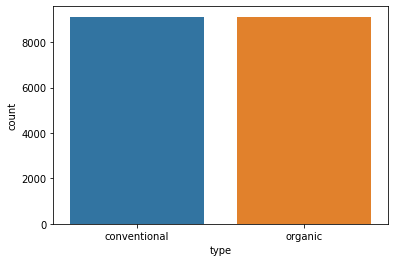

In [7]:
sns.countplot('type', data=df)
plt.show()

As it can be seen above, we have a perfect distribution of two 'type' classes.

### Region

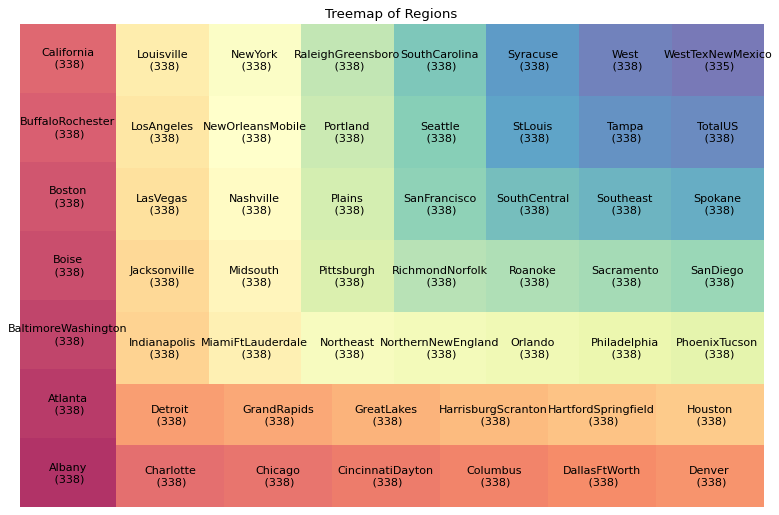

In [8]:
import squarify 

# Import Data
df_raw = pd.read_csv("avocado.csv")

# Prepare Data
df1 = df_raw.groupby('region').size().reset_index(name='counts')
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Regions')
plt.axis('off')
plt.show()

c:\users\darinela\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


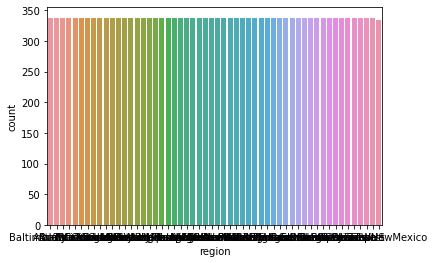

In [9]:
sns.countplot('region', data=df)
plt.show()

Again, we have a perfect distribution of avocados per region.

## Number Column Analysis

c:\users\darinela\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\darinela\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\darinela\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

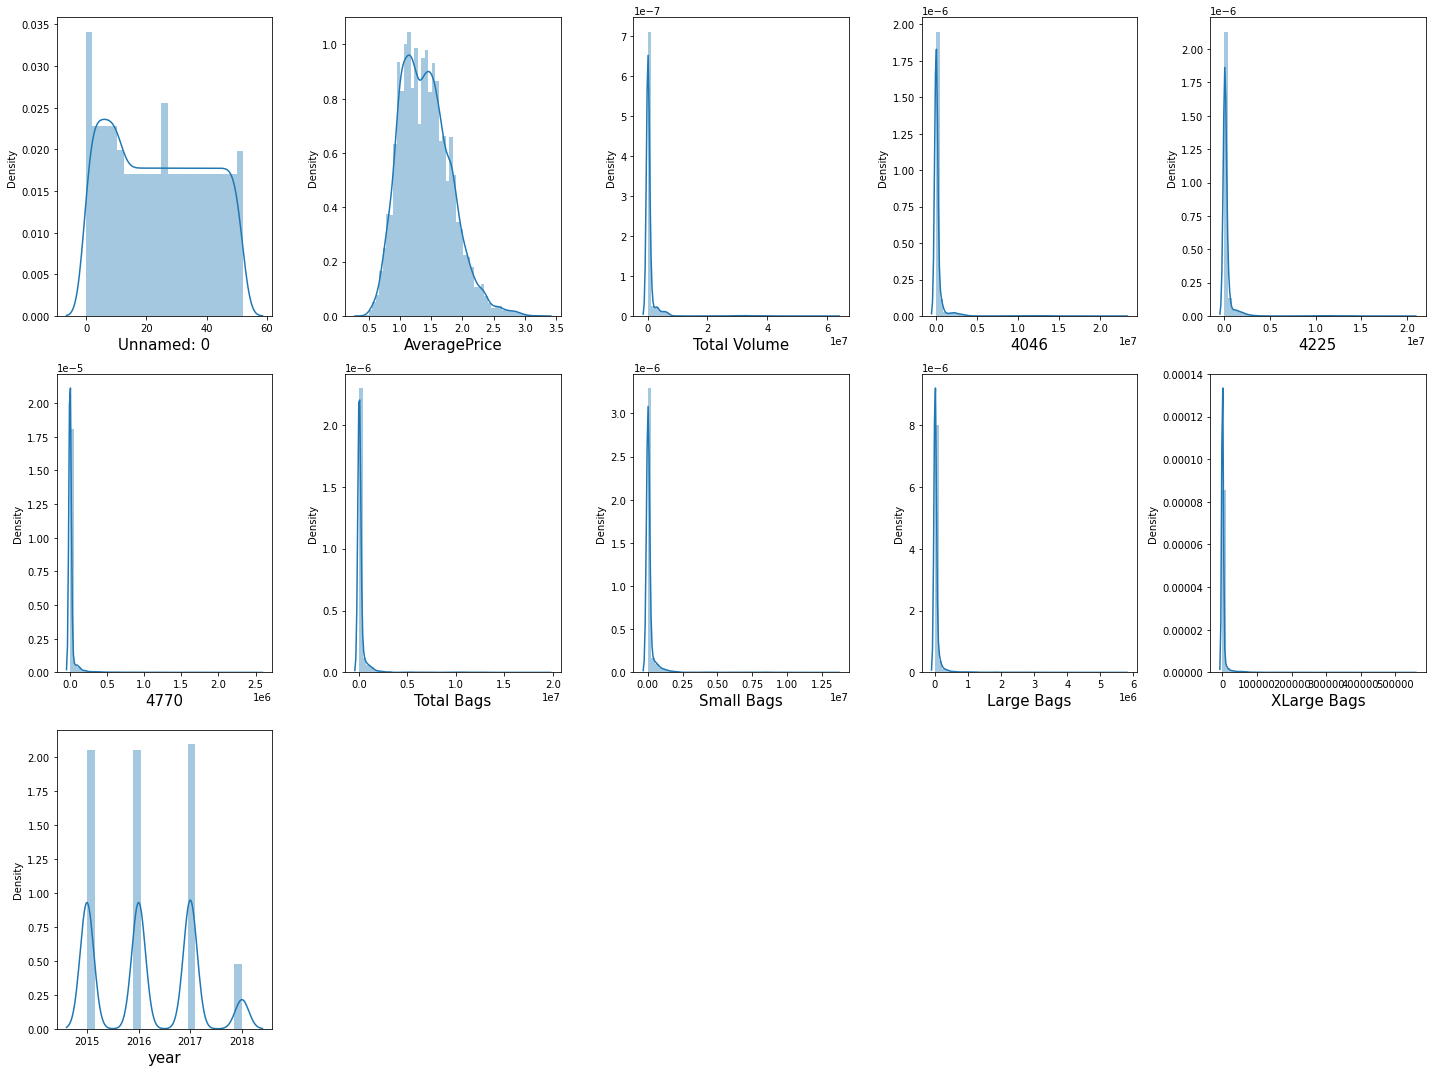

In [10]:
# Let's see how data is distributed for every column
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df.select_dtypes(include=np.number):
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

### Dates

In [11]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
# monday = 0
dates = ['year', 'month', 'day']
df[dates]

,year,month,day
0,2015,12,27
1,2015,12,20
2,2015,12,13
3,2015,12,6
4,2015,11,29
...,...,...,...
18244,2018,2,4
18245,2018,1,28
18246,2018,1,21
18247,2018,1,14


c:\users\darinela\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\darinela\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\darinela\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

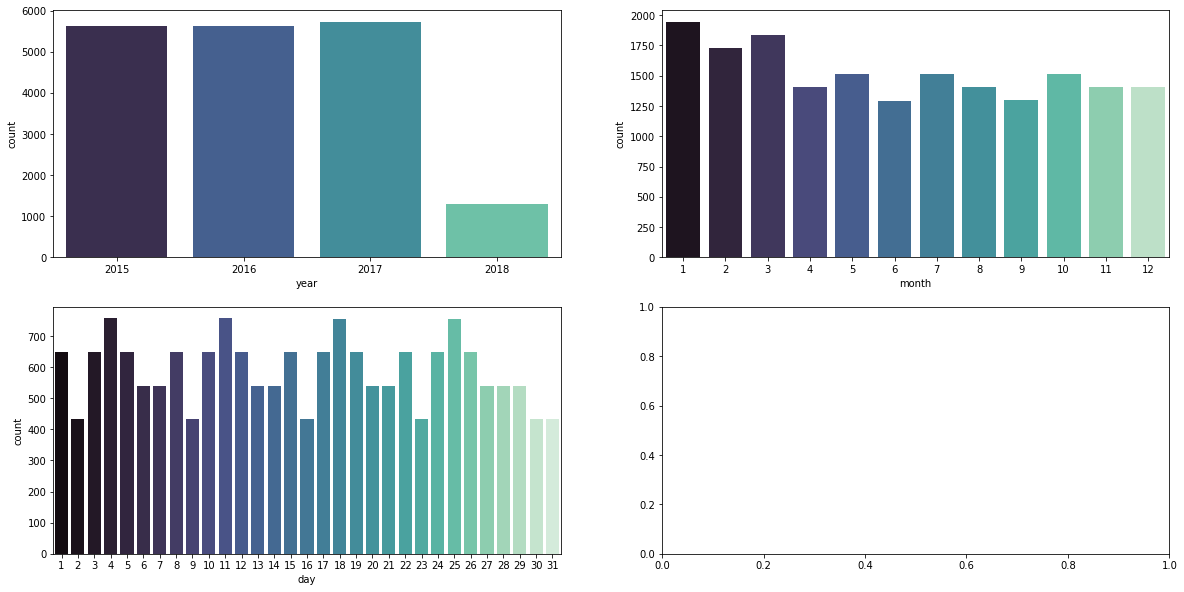

In [12]:
fig, ax = plt.subplots(2,2, figsize=(20,10))
sns.countplot('year', data=df, ax=ax[0,0], palette='mako')
sns.countplot('month', data=df, ax=ax[0,1], palette='mako')
sns.countplot('day', data=df, ax=ax[1,0], palette='mako')

plt.show()

Year: only 2018 has a different distribution, in comparison to 2015, 2016, 2017     
Month: a decreasing distribution from the beginnig of the year to december        
Day: everey 7 days we see a repeated pattern, from low to high values and so on     

In [13]:
# list_types=df['region'].unique().tolist() # Convert the array of types into a list
# list_types.sort() # Sorting the list of strings alphabetically

# plt.style.use('ggplot')
# plt.style.use('seaborn-darkgrid')

# stats=df[['AveragePrice','Total Volume','4046','4225','4770']]
# k=1
# m=0
# palette=['magma','ocean','vlag','copper','mako','winter']
# plt.figure(figsize=(10,85))
# for i in stats:
# #     print(i)
#     plt.subplot(5,1,k)
#     k=k+1
#     sns.barplot(x=df.groupby('region').sum()[i],y=list_types,palette=palette[m])
#     m=m+1
#     plt.title(str('Total of '+i))

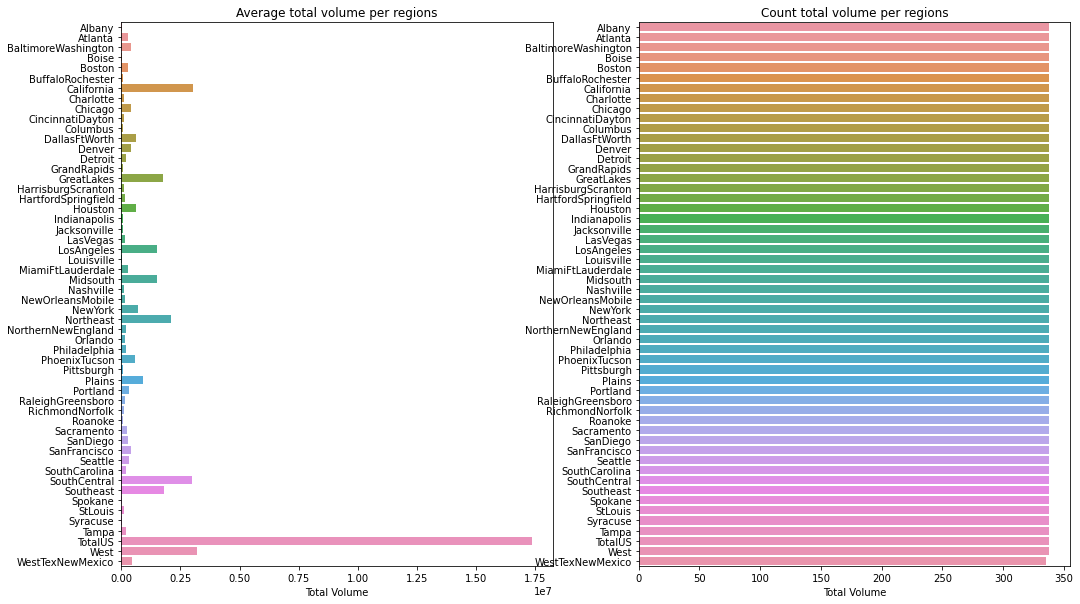

In [14]:
list_types=df['region'].unique().tolist() # Convert the array of types into a list
list_types.sort() # Sorting the list of strings alphabetically

plt.figure(figsize=(17,10))
plt.subplot(1,2,1)
sns.barplot(x=df.groupby('region').mean()['Total Volume'], y=list_types)
plt.title('Average total volume per regions')

plt.subplot(1,2,2)
sns.barplot(x=df.groupby('region').count()['Total Volume'], y=list_types)
plt.title('Count total volume per regions')
plt.show()

From the plots above we see that even if a equal number of observations we have per region, the biggest amount of avocados were sold in West, California and SouthCentral.

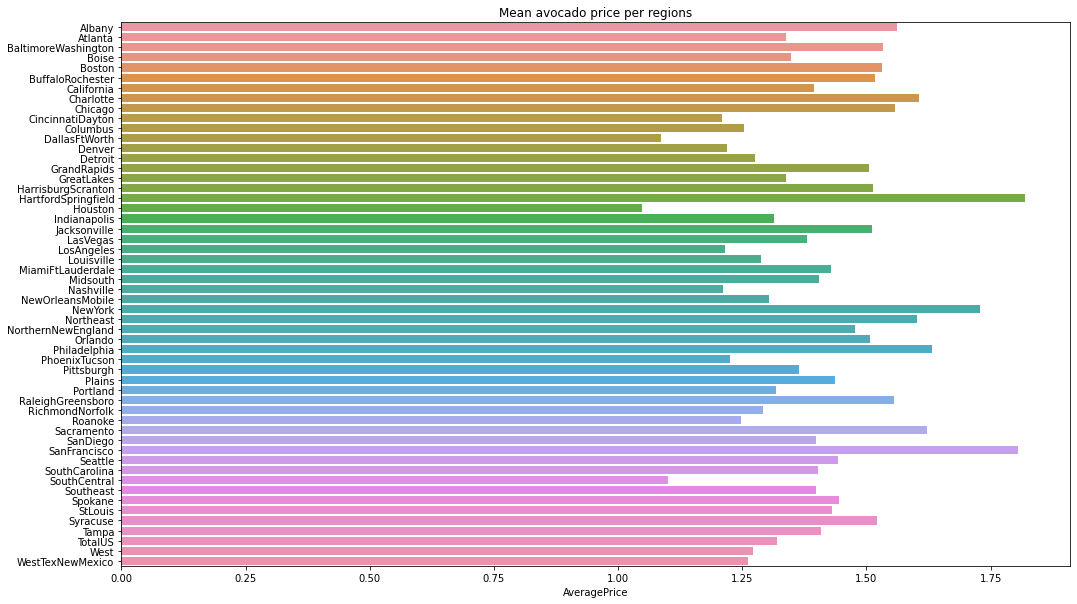

In [15]:
plt.figure(figsize=(17,10))
sns.barplot(x=df.groupby('region').mean()['AveragePrice'], y=list_types)
plt.title('Mean avocado price per regions')
plt.show()

In the plot above we can see the average price per region. Take a look that in those regions were the average price in higher (like SanFrancisco, HartfordSpringfield, New York) weren't sold so many avocados, but in SouthCentral, for example were the avg price is = 1.1, the average total volume of avocado which were sold is around 2991951,535.

In [16]:
df.groupby('region').mean()['AveragePrice']['SouthCentral']

1.101242603550296

In [17]:
df.groupby('region').mean()['Total Volume']['SouthCentral']

2991951.535

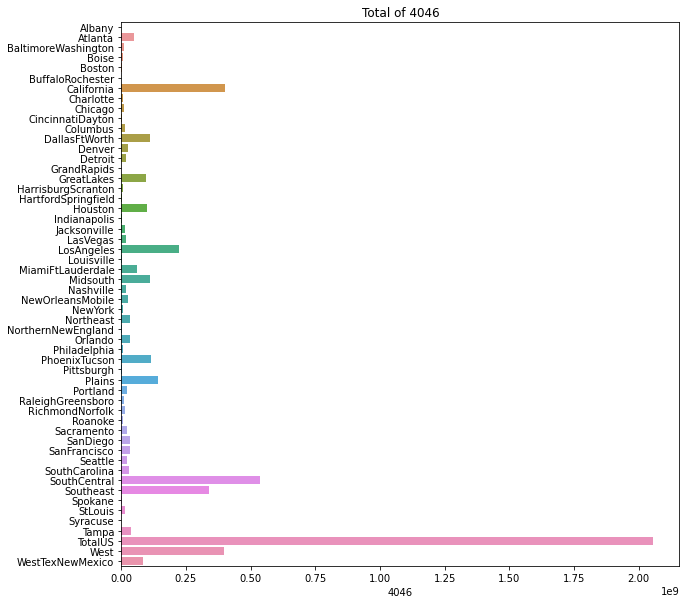

In [18]:
list_types=df['region'].unique().tolist() # Convert the array of types into a list
list_types.sort() # Sorting the list of strings alphabetically
plt.figure(figsize=(10,10))
sns.barplot(x=df.groupby('region').sum()['4046'], y=list_types)
plt.title('Total of 4046')
plt.show()

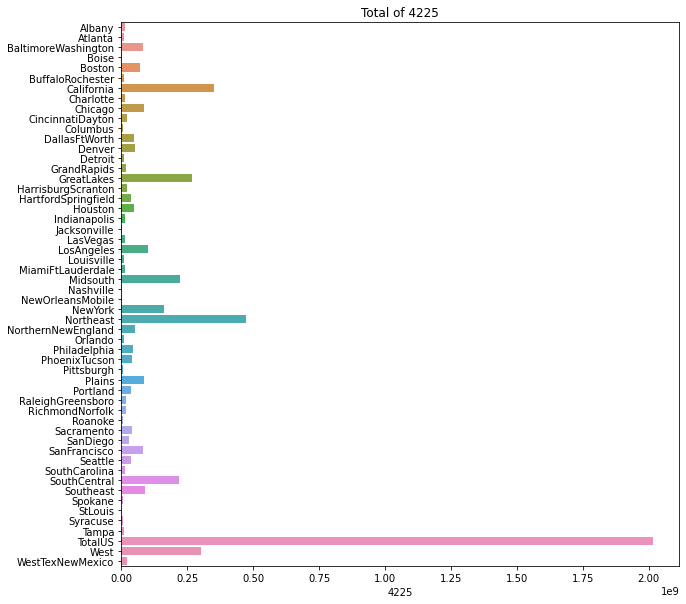

In [19]:
list_types=df['region'].unique().tolist() # Convert the array of types into a list
list_types.sort() # Sorting the list of strings alphabetically
plt.figure(figsize=(10,10))
sns.barplot(x=df.groupby('region').sum()['4225'], y=list_types)
plt.title('Total of 4225')
plt.show()

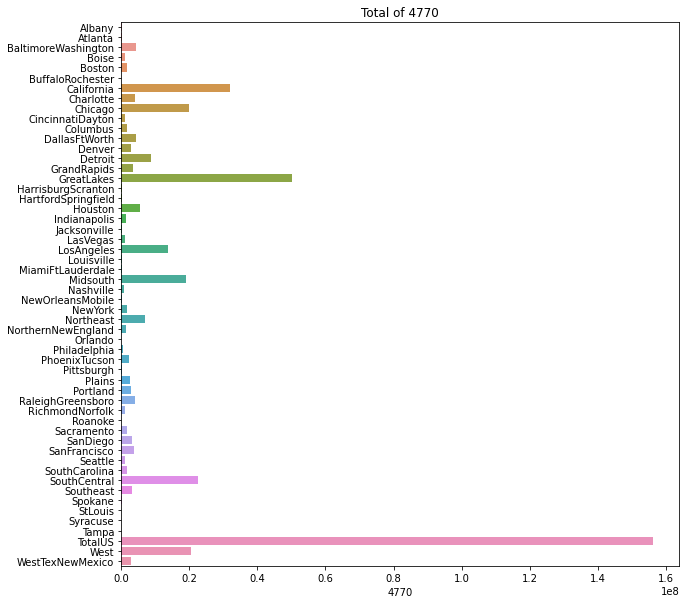

In [20]:
list_types=df['region'].unique().tolist() # Convert the array of types into a list
list_types.sort() # Sorting the list of strings alphabetically
plt.figure(figsize=(10,10))
sns.barplot(x=df.groupby('region').sum()['4770'], y=list_types)
plt.title('Total of 4770')
plt.show()

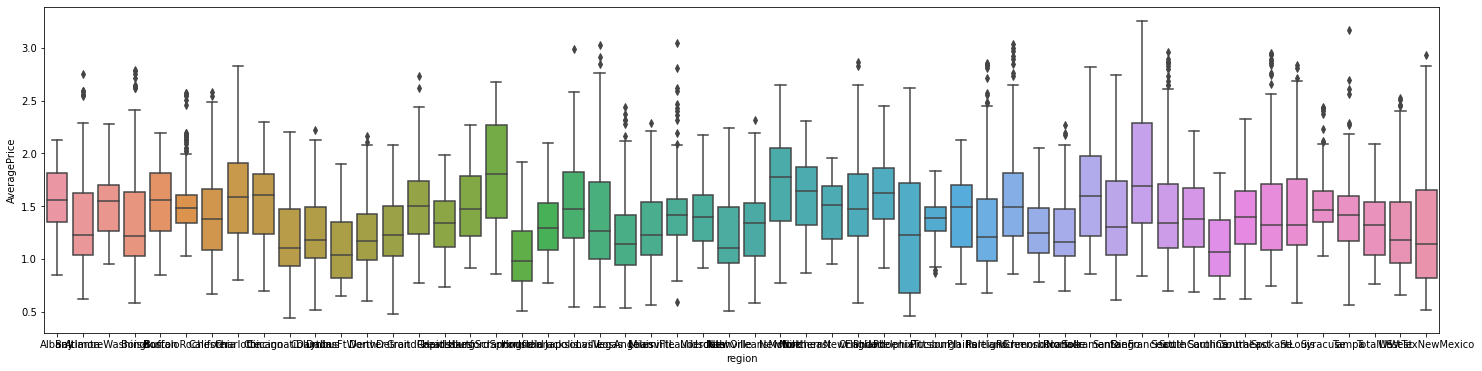

In [21]:
plt.figure(figsize=(25,6))
sns.boxplot(x=df['region'], y=df['AveragePrice']);

The boxplot helps us to identify some outlayers from Average Price

## Get dummies

In [22]:
df1 = df
df1 = pd.get_dummies(df['type'],drop_first=True)
df1 = pd.concat([df, df1], axis=1)
df1 = df1.drop(['Date', 'type', 'Unnamed: 0', 'region'],axis = 1)
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day,organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


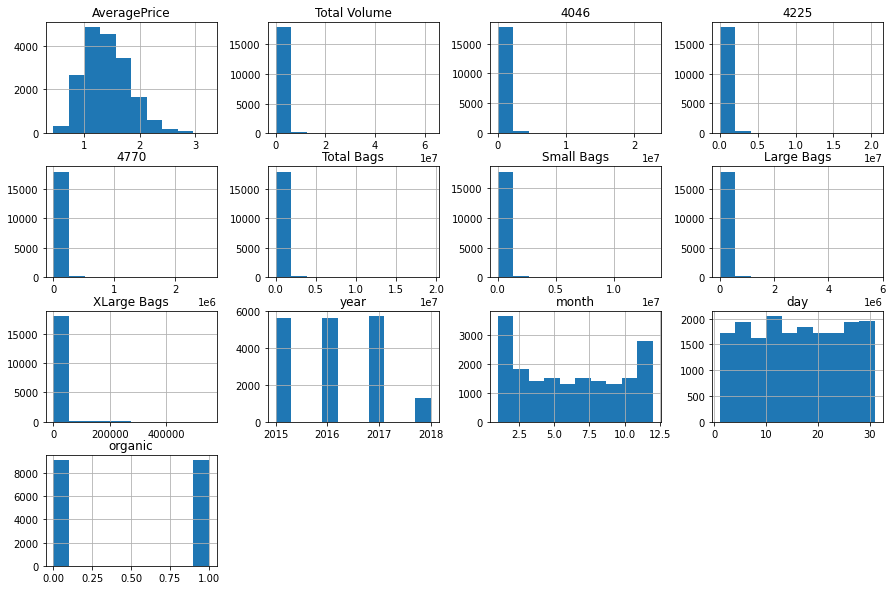

In [23]:
p = df1.hist(figsize=(15, 10))

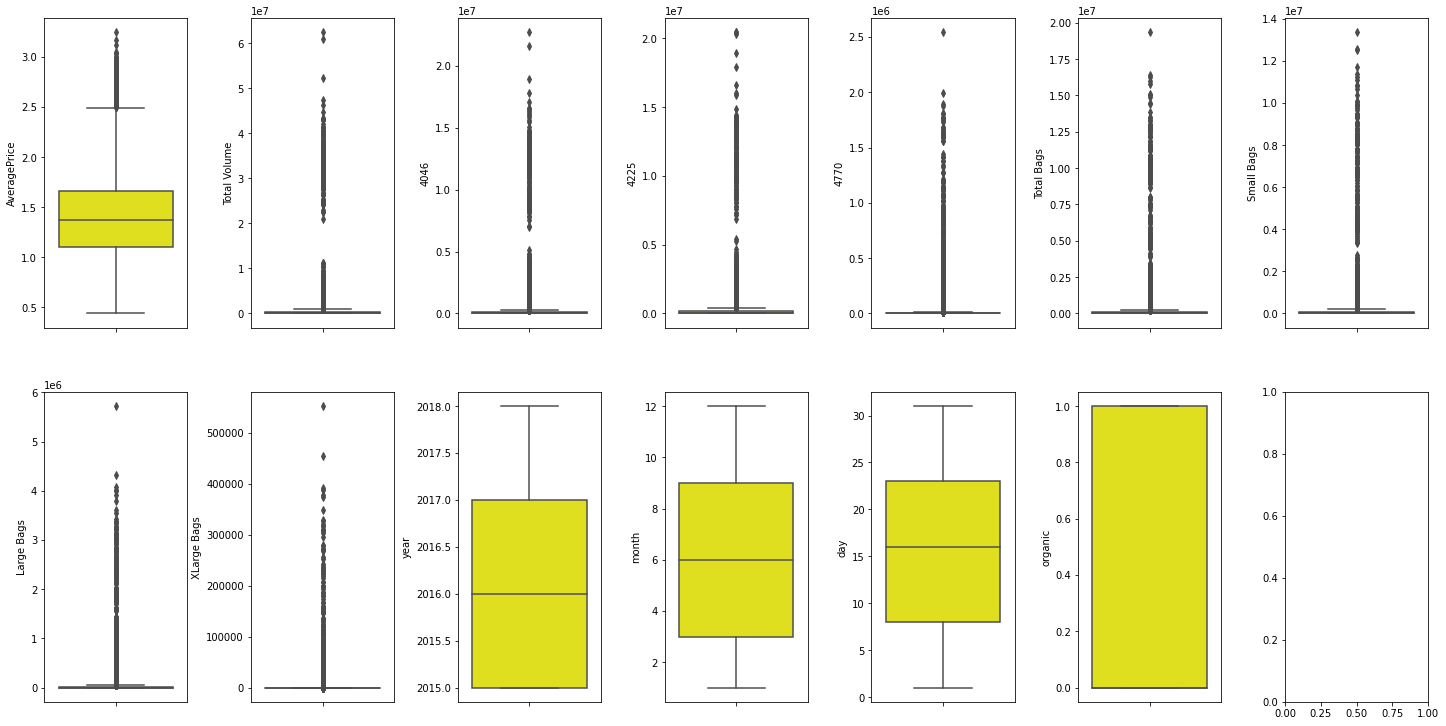

Column AveragePrice outliers = 1.15%
Column Total Volume outliers = 12.59%
Column 4046 outliers = 13.80%
Column 4225 outliers = 13.80%
Column 4770 outliers = 15.99%
Column Total Bags outliers = 13.88%
Column Small Bags outliers = 13.19%
Column Large Bags outliers = 14.83%
Column XLarge Bags outliers = 22.00%
Column year outliers = 0.00%
Column month outliers = 0.00%
Column day outliers = 0.00%
Column organic outliers = 0.00%


In [24]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df1.items():
    sns.boxplot(y=k, data=df1, ax=axs[index],color="yellow")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

for k, v in df1.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df1)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

<AxesSubplot:>

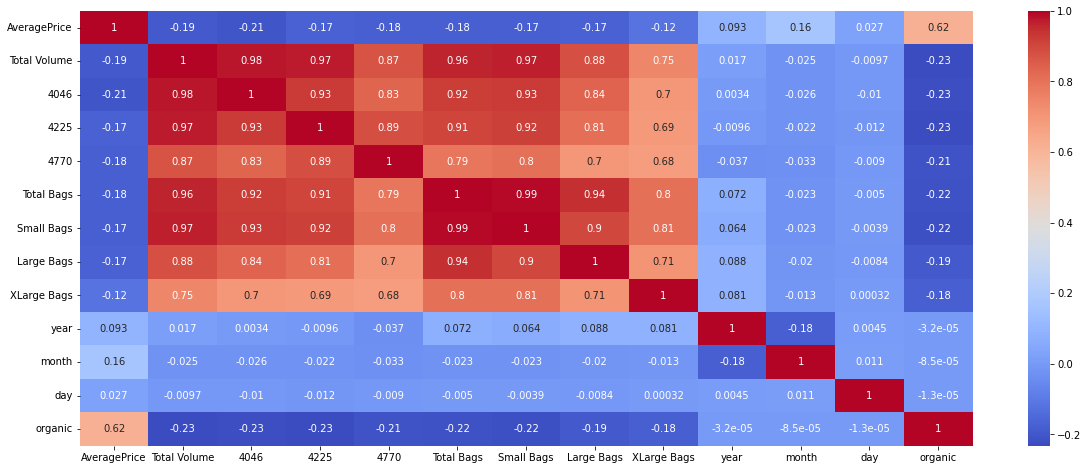

In [25]:
# correlation using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')

# Train Test 

In [64]:
from sklearn.model_selection import train_test_split
X = df1.drop('AveragePrice', axis = 1)
y = df1['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred=lr.predict(X_test)

In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23297133291663427
MSE: 0.09108802805345187
RMSE: 0.30180793238987585


In order to see if our model is good, is not enough to look at the metrics above.

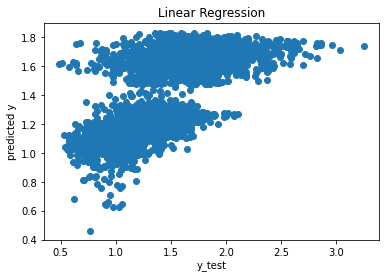

In [67]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Linear Regression')
plt.show()

As it can be seen, we do not really have a stright line in this scatter plot.

### Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13749589041095892
MSE: 0.04592706849315069
RMSE: 0.21430601599850316


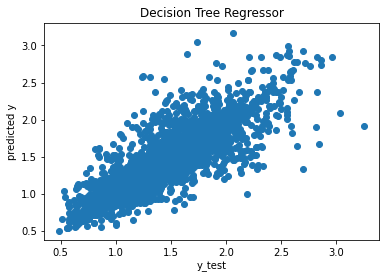

In [70]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Decision Tree Regressor')
plt.show()

Ok, now it looks more like a stright line and ther RMSE went from 0.30 to 0.21. Let's see another model

### Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train, y_train)
pred = rdr.predict(X_test)

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10098413698630138
MSE: 0.021403694621917803
RMSE: 0.1463000157960272


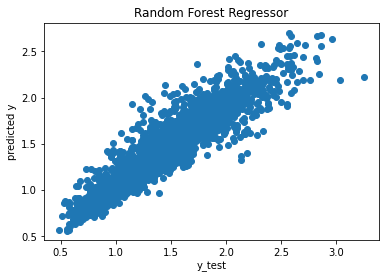

In [73]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Random Forest Regressor')
plt.show()

In comparison to Linear Regression and Decision Tree Regression, we have a better representation of the "stright line" and RMSE is lower for RandomForestRegressor.

In [75]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rdr.estimators_[0], feature_names=X.columns, filled=True)

Error in callback <function flush_figures at 0x00000237FEF50700> (for post_execute):


KeyboardInterrupt: 

In [110]:
!pip install dtreeviz

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\py.test.exe' -> 'C:\\Python310\\Scripts\\py.test.exe.deleteme'




  Using cached dtreeviz-1.3.3.tar.gz (61 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached matplotlib-3.5.1-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached pytest-7.0.1-py3-none-any.whl (296 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached atomicwrites-1.4.0-py2.py3-none-any.whl (6.8 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
Using legacy 'setup.py install' for dtreeviz, since package 'wheel' is not installed.


In [36]:
from dtreeviz.trees import dtreeviz # will be used for tree visualization
viz = dtreeviz(rdr.estimators_[0], X, y, feature_names=X.columns, target_name="AveragePrice")
viz

KeyboardInterrupt: 

## Feature Selection

### p-value

In [76]:
from kydavra import PValueSelector
pv_s = PValueSelector()
selected_cols = pv_s.select(df1, 'AveragePrice')
selected_cols

['Total Volume',
 '4046',
 '4225',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'month',
 'day',
 'organic']

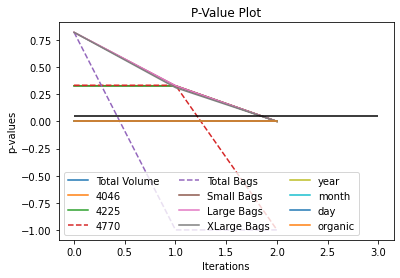

In [77]:
pv_s.plot_process()

In [78]:
X = df1[selected_cols]
Y = df1['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rdr = RandomForestRegressor()
rdr.fit(X_train, y_train)
pred = rdr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10491386301369861
MSE: 0.023019043336986296
RMSE: 0.15172027991335335


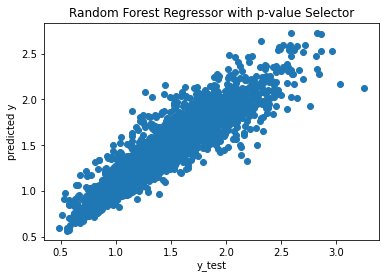

In [79]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Random Forest Regressor with p-value Selector')
plt.show()

### Point Biserial

In [80]:
from kydavra import PointBiserialCorrSelector
point_biseral = PointBiserialCorrSelector()
selected_cols = point_biseral.select(df1, 'AveragePrice')
selected_cols

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'month',
 'day',
 'organic']

In [81]:
X = df1[selected_cols]
Y = df1['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rdr = RandomForestRegressor()
rdr.fit(X_train, y_train)
pred = rdr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10042443835616438
MSE: 0.021102201315068486
RMSE: 0.14526596750467222


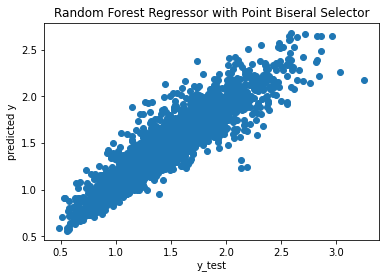

In [82]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Random Forest Regressor with Point Biseral Selector')
plt.show()

In [83]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\darinela\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [47]:
import lime
import lime.lime_tabular

In [63]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=['Unnamed: 0','Date','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region','month','day'], 
                                                   class_names=['Average Price'], 
                                                   categorical_features=['organic', 'region', 'year'], 
                                                   verbose=True, 
                                                   mode='regression')

InvalidIndexError: (slice(None, None, None), 0)

In [84]:
from lime.lime_tabular import LimeTabularExplainer 
explainer = LimeTabularExplainer(X, 
                      feature_names=X.columns, 
                      class_names=['region', 'organic', 'year'], 
                      verbose=True,
                      mode='regression')

InvalidIndexError: (slice(None, None, None), 0)